<a href="https://colab.research.google.com/github/gguillaux/loterias-caixa/blob/master/lotofacil_2020.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import os
import io
import requests
import numpy as np
import pandas as pd
import seaborn as sns
from zipfile import ZipFile
from bs4 import BeautifulSoup as bs
from matplotlib import pyplot as plt

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [0]:
lotofacil_url = r'http://www1.caixa.gov.br/loterias/_arquivos/loterias/D_lotfac.zip'
destiny_folder = './zip'

In [0]:
def download_zip_file_lotofacil(url):
    # check if download folder already exists
    os.makedirs(destiny_folder, exist_ok=True)

    # download zip file in memory
    r = requests.get(url)    
    z = ZipFile(io.BytesIO(r.content))

    # download htm file
    for f in z.filelist:
        if '.htm' in f.filename:
            file_path = os.path.join(destiny_folder, f.filename)
            z.extract(f.filename, 
                      destiny_folder)
            print('File {} downloaded at {}'.format(f.filename, 
                                                    file_path))
            return file_path
    print('No files were found for download')
    return None


def get_raw_dataframe(filepath):
    df = pd.read_html(source, 
                      thousands='.', 
                      decimal=',', 
                      #parse_dates=['Data Sorteio'], 
                      index_col=1)[0].drop_duplicates()
            
    df.index = pd.to_datetime(df.index, 
                              infer_datetime_format=True)
    return df


def plot_winners(df, ini=2004):
    plt.style.use('dark_background')
    win_cols = [c for c in df.columns if 'Ganhadores' in c]
    win = df[win_cols].drop_duplicates()
    fig, ax = plt.subplots(len(win_cols))
    fig.set_size_inches(28, 18)
    for i, c in enumerate(win_cols):
        aux = win[c][ini:]
        v_mean = [np.mean(aux)] * len(aux)
        aux.plot(ax=ax[i], title=c)
        ax[i].plot(aux.index, v_mean, linestyle='--', c='y')
    fig.tight_layout(pad=2.0)
    fig.suptitle('Start year = {}'.format(ini), fontsize=20)
    fig.subplots_adjust(top=0.93)
    plt.show()  


def get_frequency_table(df):
    
    def numbers_found_matrix(v):
        bolas = {i : 0 for i in range(1, 26)}

        for i in v:
            bolas[i] += 1

        return bolas

    balls = [c for c in df.columns if 'Bola' in c]
    dfc = df_raw[balls].drop_duplicates()
    aux = list(map(numbers_found_matrix, dfc.values))
    return pd.DataFrame(aux)


def get_withdraw_summary(df, window=30):
    aux = df.tail(window)
    # fig, ax = plt.subplots(figsize=(15,12))
    # sns.heatmap(aux, cmap='Blues')
    # ax.set_title('Frequencia com janela de {} dias'.format(window))

    freq = round(aux.sum() / window, 2) * 100
    j = pd.DataFrame(freq, columns=['frequencies']).T
    fig, ax = plt.subplots(figsize=(15,2))
    sns.heatmap(j, cmap='Blues', annot=True)
    return freq.T
  

In [4]:
# download file and get filepath
source = download_zip_file_lotofacil(lotofacil_url)

# get a raw dataframe
df_raw = get_raw_dataframe(source)

File d_lotfac.htm downloaded at ./zip/d_lotfac.htm


In [5]:
df_raw.head()

,Concurso,Bola1,Bola2,Bola3,Bola4,Bola5,Bola6,Bola7,Bola8,Bola9,Bola10,Bola11,Bola12,Bola13,Bola14,Bola15,Arrecadacao_Total,Ganhadores_15_Números,Cidade,UF,Ganhadores_14_Números,Ganhadores_13_Números,Ganhadores_12_Números,Ganhadores_11_Números,Valor_Rateio_15_Números,Valor_Rateio_14_Números,Valor_Rateio_13_Números,Valor_Rateio_12_Números,Valor_Rateio_11_Números,Acumulado_15_Números,Estimativa_Premio,Valor_Acumulado_Especial
Data Sorteio,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
2003-09-29,1,18,20,25,23,10,11,24,14,6,2,13,9,5,16,3,0.0,5,NaN,BA,154,4645,48807,257593,49765.82,689.84,10.0,4.0,2.0,0.0,0.0,0.0
2003-09-29,1,18,20,25,23,10,11,24,14,6,2,13,9,5,16,3,0.0,5,NaN,PR,154,4645,48807,257593,49765.82,689.84,10.0,4.0,2.0,0.0,0.0,0.0
2003-09-29,1,18,20,25,23,10,11,24,14,6,2,13,9,5,16,3,0.0,5,NaN,SP,154,4645,48807,257593,49765.82,689.84,10.0,4.0,2.0,0.0,0.0,0.0
2003-10-06,2,23,15,5,4,12,16,20,6,11,19,24,1,9,13,7,0.0,1,NaN,SP,184,6232,81252,478188,596323.70,1388.95,10.0,4.0,2.0,0.0,0.0,0.0
2003-10-13,3,20,23,12,8,6,1,7,11,14,4,16,10,9,17,24,0.0,2,NaN,SP,158,6897,96244,608211,400623.70,2173.36,10.0,4.0,2.0,0.0,0.0,0.0


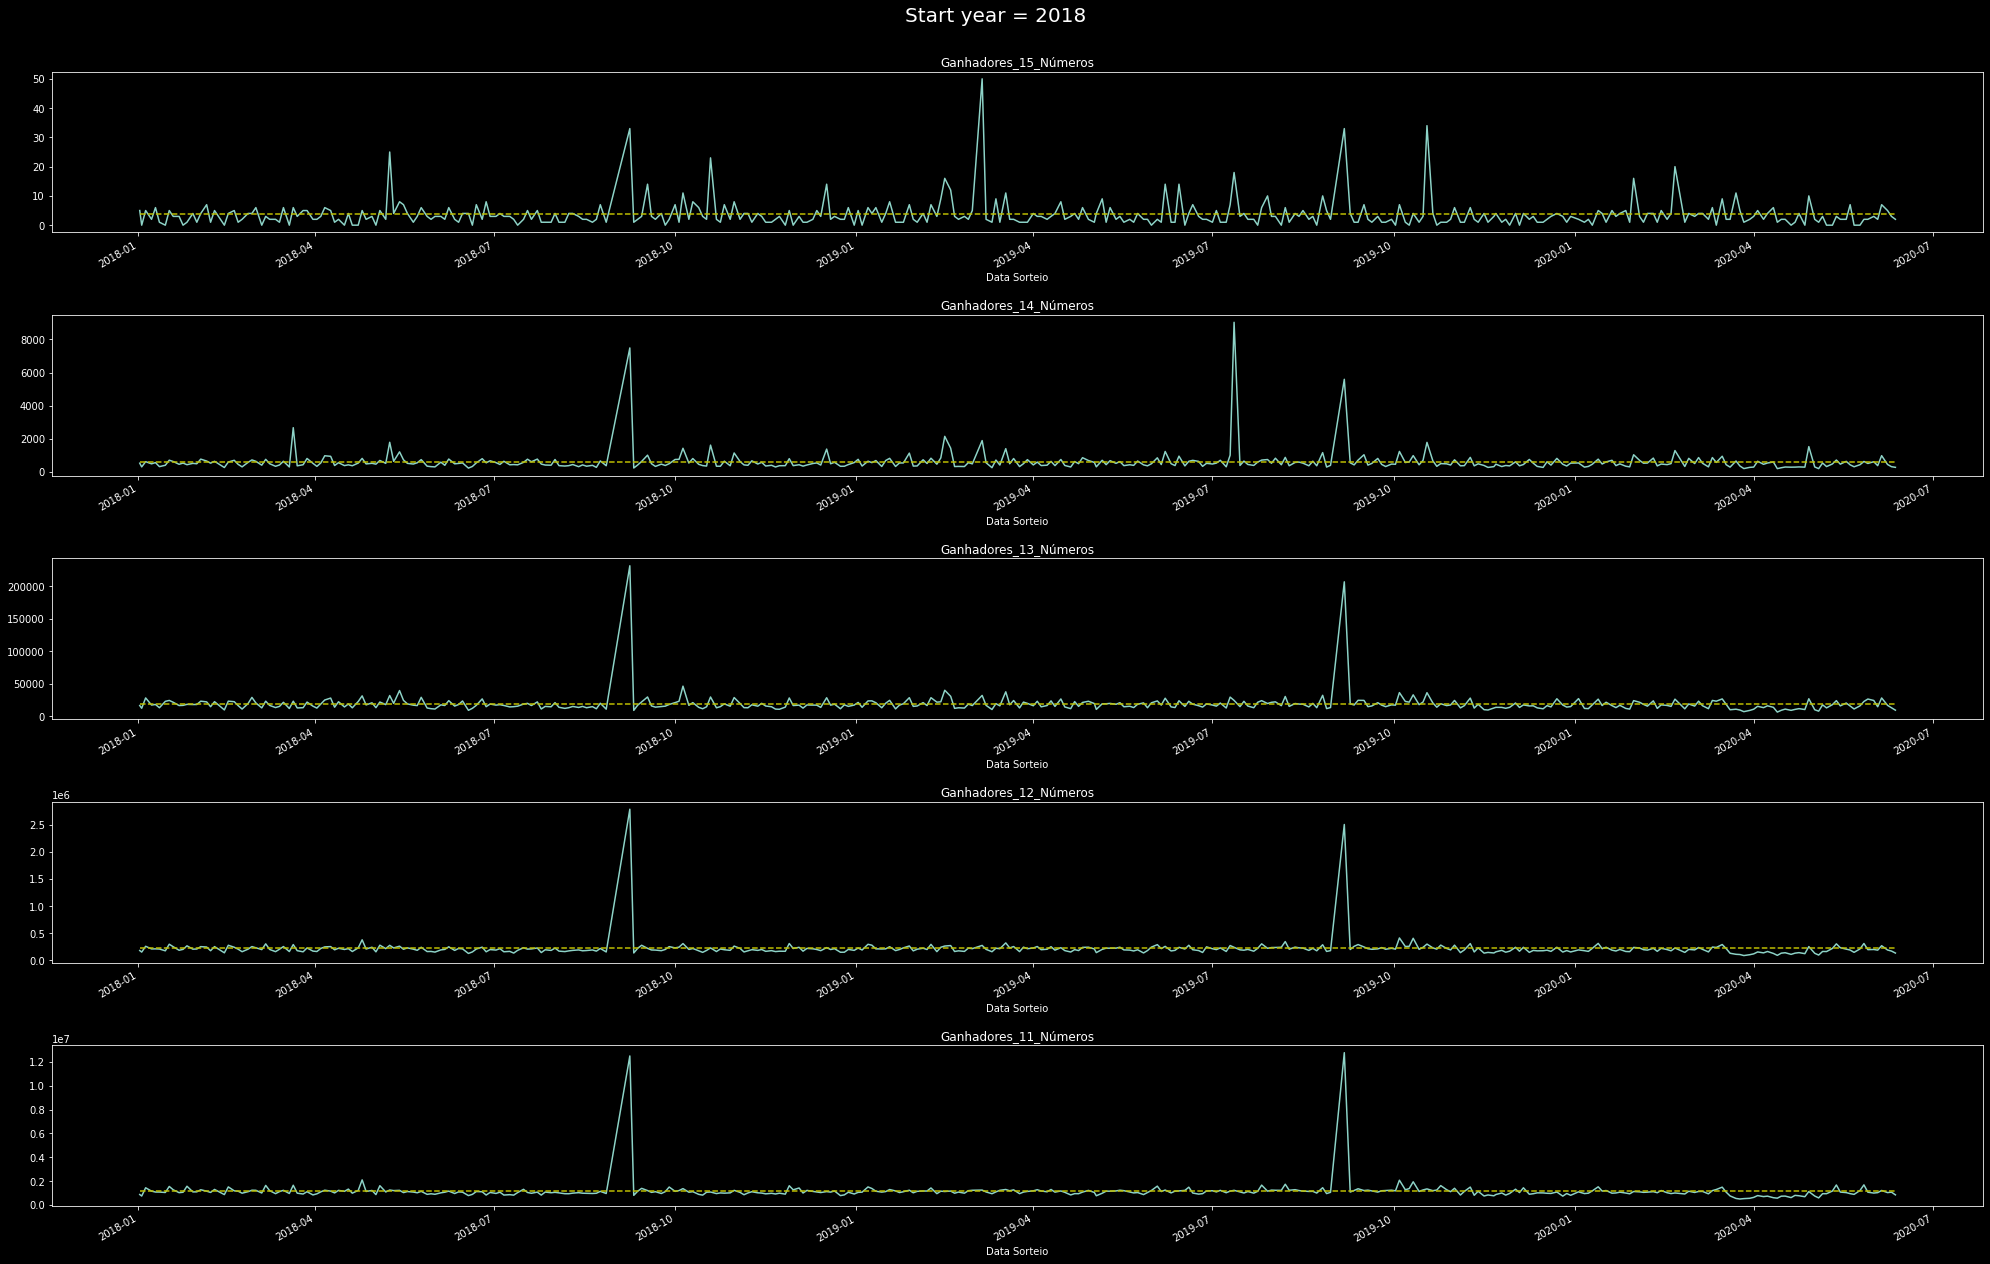

In [6]:
plot_winners(df_raw, '2018')

In [0]:
aux = get_frequency_table(df_raw)

Ultimos 10 sorteios. Media = 60.0
Ultimos 15 sorteios. Media = 60.04
Ultimos 20 sorteios. Media = 60.0
Ultimos 25 sorteios. Media = 60.0
Ultimos 30 sorteios. Media = 59.88
Ultimos 35 sorteios. Media = 59.96
Ultimos 40 sorteios. Media = 59.92
Ultimos 45 sorteios. Media = 60.04
Ultimos 50 sorteios. Media = 60.0
Ultimos 55 sorteios. Media = 60.0
Ultimos 60 sorteios. Media = 60.04
Ultimos 65 sorteios. Media = 60.04


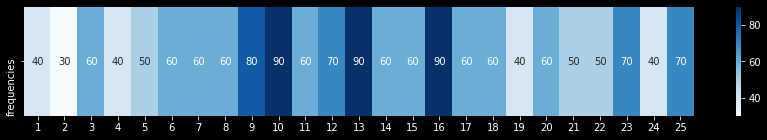

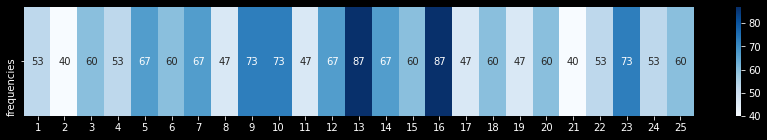

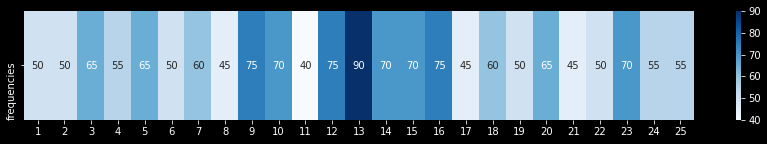

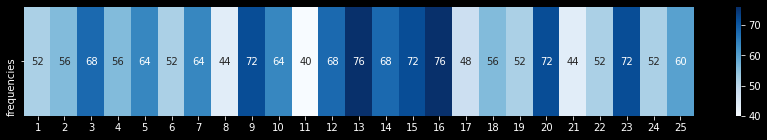

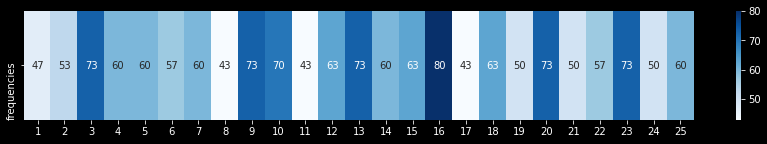

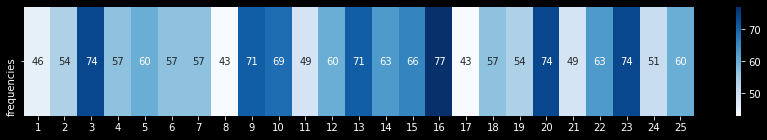

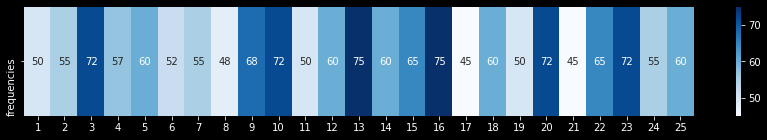

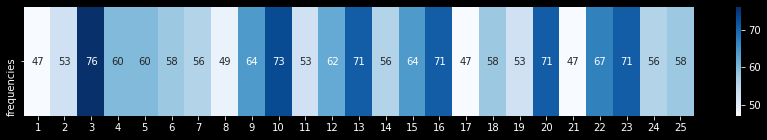

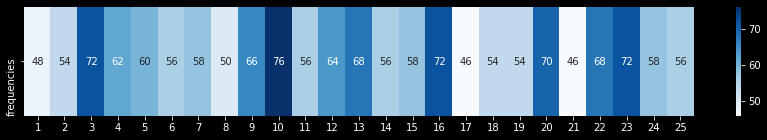

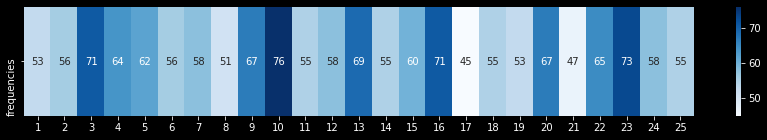

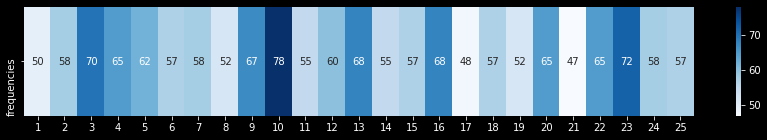

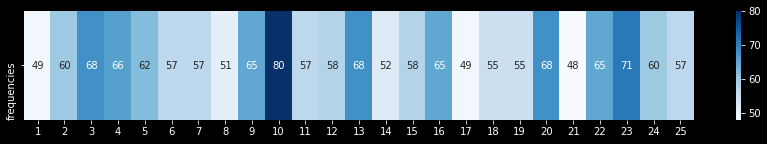

In [8]:
for x in range(10, 70, 5):
    k = get_withdraw_summary(aux, x)
    print('Ultimos {} sorteios. Media = {}'.format(x, k.mean()))